# Laboratorio 3: aprendizaje no supervisado

## Item 1: importar dataset y plotear 10 imágenes
Para este laboratorio utilizaremos el fashion_mnist. Cada imagen tiene 28x28 dimensiones. Como son pequeñas, no vemos la necesidad de redimensionarlas.

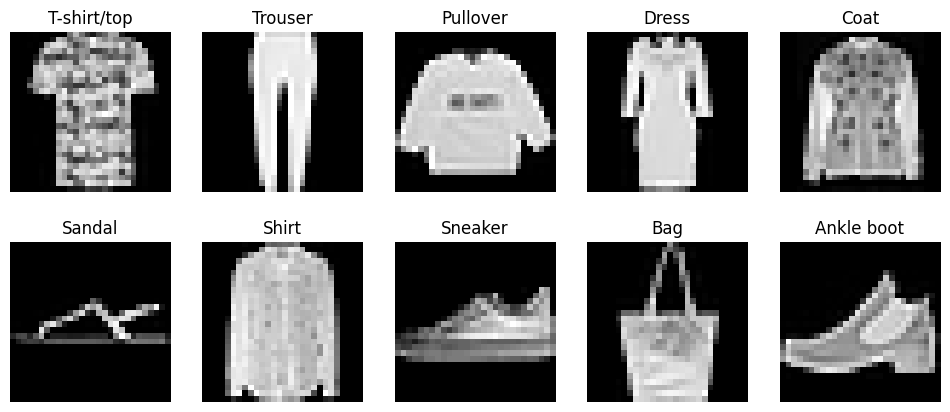

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carga el conjunto de datos Fashion MNIST (asegúrate de cambiar la ruta al archivo CSV descargado)
data = pd.read_csv('fashion_mnist/fashion-mnist_train.csv')

# Etiquetas de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Filtra 10 ejemplos, uno por clase
samples_per_class = 1
sample_images = []

for i in range(10):
    class_data = data[data['label'] == i].head(samples_per_class)
    sample_images.append(class_data)

# Plotea los ejemplos
plt.figure(figsize=(12, 5))
for i, images in enumerate(sample_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images.iloc[0, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()


## Item 2: PCA sin embeddings

Ploteo de los datos proyectados por clase

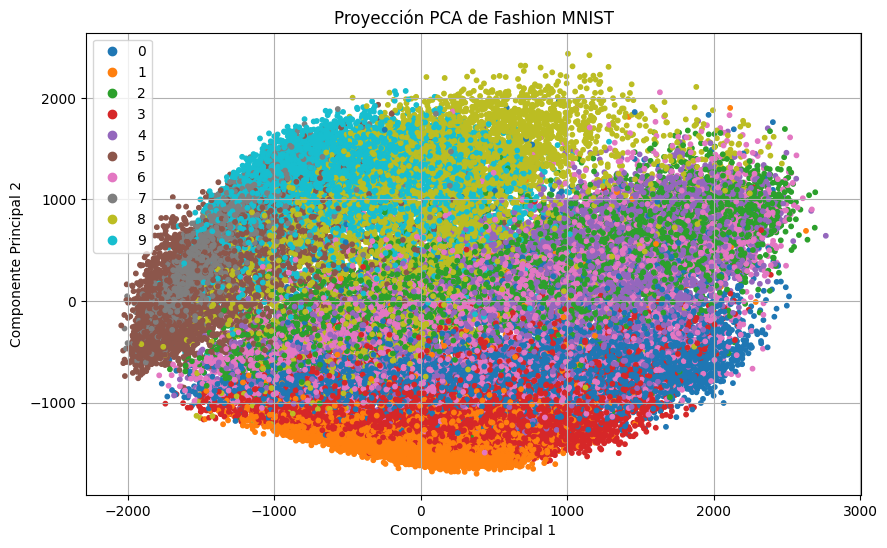

In [2]:
from sklearn.decomposition import PCA

# Extrae las características (columnas de píxeles)
X = data.iloc[:, 1:].values

# Extrae las etiquetas de clase
y = data['label'].values

# Realiza la reducción de dimensionalidad con PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotea los datos proyectados con colores por clase
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', marker='o', s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=[str(i) for i in range(10)])
plt.title('Proyección PCA de Fashion MNIST')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

Ploteo de los eigenvectors

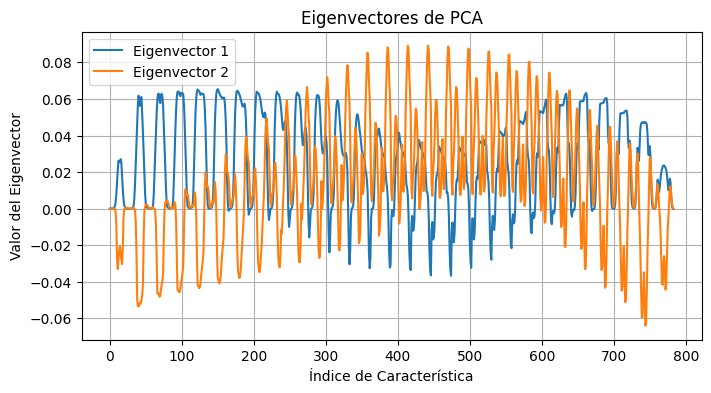

In [3]:
# Plotea los dos eigenvectores en un gráfico separado
plt.figure(figsize=(8, 4))
plt.plot(pca.components_[0], label='Eigenvector 1')
plt.plot(pca.components_[1], label='Eigenvector 2')
plt.title('Eigenvectores de PCA')
plt.xlabel('Índice de Característica')
plt.ylabel('Valor del Eigenvector')
plt.legend()
plt.grid()
plt.show()

## Item 3: PCA con embeddings

Ploteo de los datos proyectados por clase utilizando un embedding de 2 dimensiones.

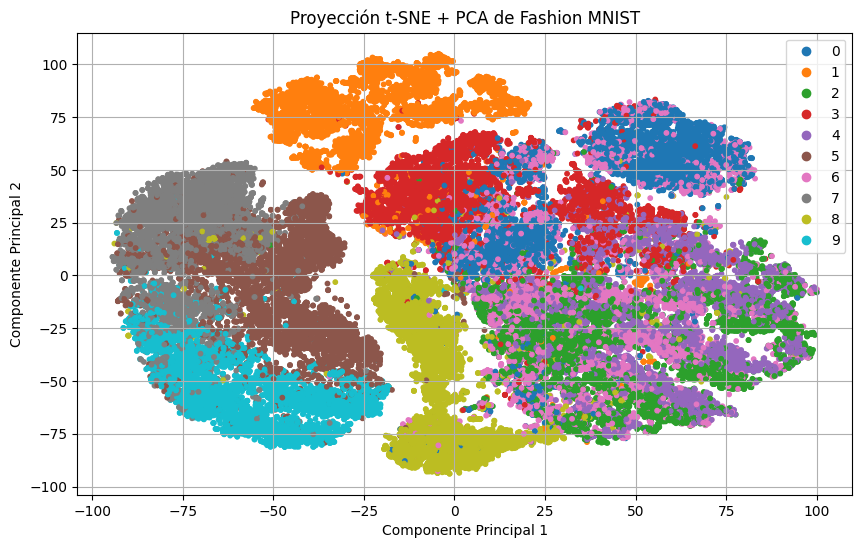

In [9]:
from sklearn.manifold import TSNE

# Extrae las características (columnas de píxeles)
X = data.iloc[:, 1:].values

# Extrae las etiquetas de clase
y = data['label'].values

# Realiza el embedding t-SNE (ajusta la dimensión según sea necesario)
tsne = TSNE(n_components=2)  # Embedding con 50 dimensiones
X_tsne = tsne.fit_transform(X)

# Realiza la reducción de dimensionalidad con PCA a 2 componentes en el embedding t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tsne)

# Plotea los datos proyectados con colores por clase
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', marker='o', s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=[str(i) for i in range(10)])
plt.title('Proyección t-SNE + PCA de Fashion MNIST')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

Ploteo de eigenvectors:

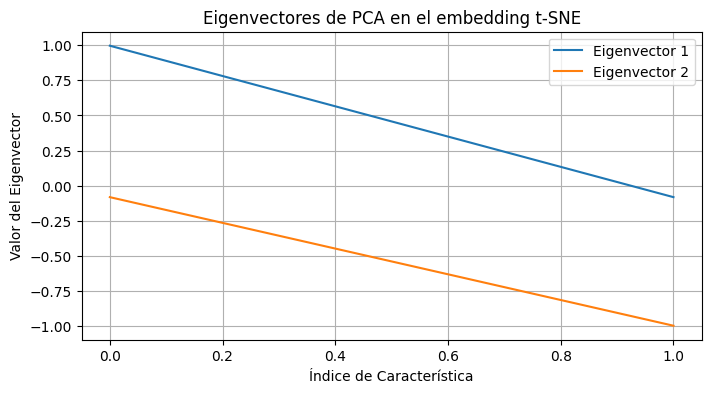

In [10]:
# Plotea los dos eigenvectores en un gráfico separado
plt.figure(figsize=(8, 4))
plt.plot(pca.components_[0], label='Eigenvector 1')
plt.plot(pca.components_[1], label='Eigenvector 2')
plt.title('Eigenvectores de PCA en el embedding t-SNE')
plt.xlabel('Índice de Característica')
plt.ylabel('Valor del Eigenvector')
plt.legend()
plt.grid()
plt.show()

## Item 4: Proyectar data en 2 dimensiones utilizando solamente t-SNE

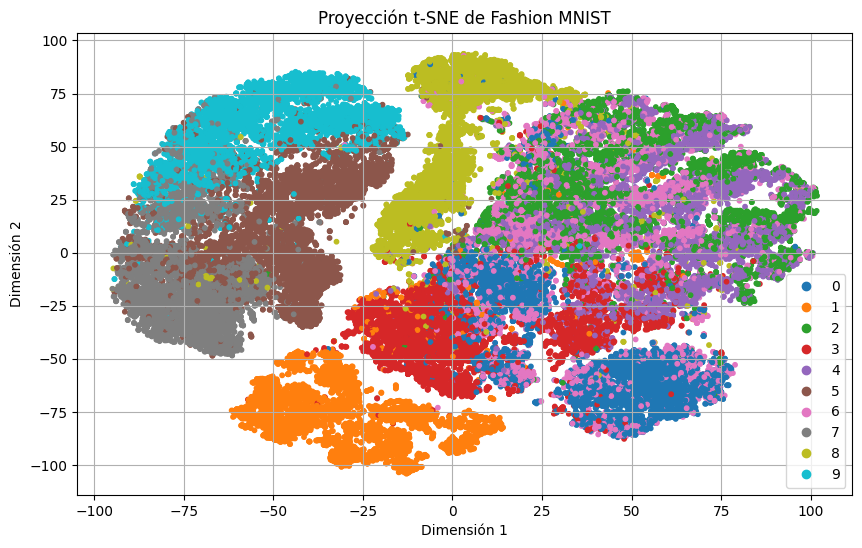

In [12]:
from sklearn.manifold import TSNE

# Extrae las características (columnas de píxeles)
X = data.iloc[:, 1:].values

# Extrae las etiquetas de clase
y = data['label'].values

# Realiza el embedding t-SNE a dos dimensiones
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plotea los datos proyectados con colores por clase
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', marker='o', s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=[str(i) for i in range(10)])
plt.title('Proyección t-SNE de Fashion MNIST')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid()
plt.show()

## Item 5: Proyectar data en 2 dimensiones utilizando solamente t-SNE + embedding

Nota: Para este item se tomaron solo 10k de los 60k datapoints porque la memoria RAM no soportaba tantos datos.

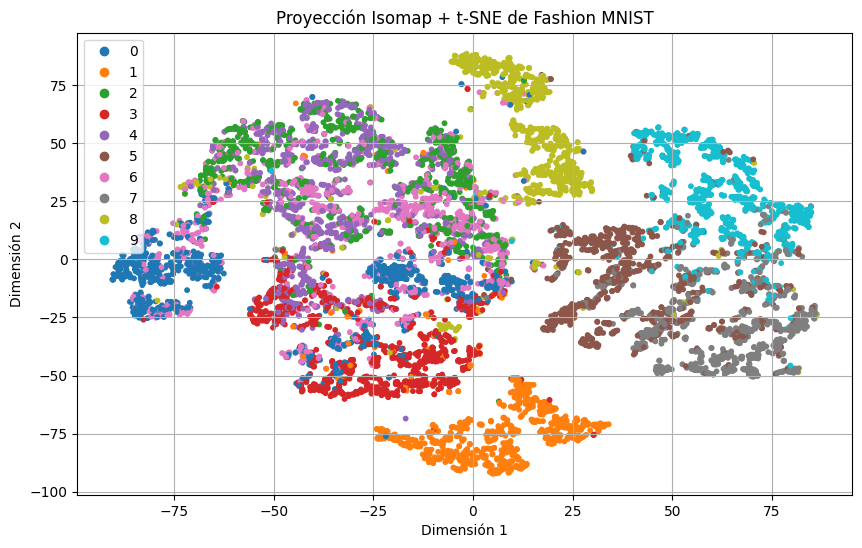

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, TSNE

# Carga el conjunto de datos Fashion MNIST (asegúrate de cambiar la ruta al archivo CSV descargado)
data = pd.read_csv('fashion_mnist/fashion-mnist_train.csv')

# Extrae una muestra aleatoria de los datos (por ejemplo, 10,000 ejemplos)
data_sample = data.sample(n=10000, random_state=42)

# Extrae las características (columnas de píxeles) de la muestra
X = data_sample.iloc[:, 1:].values

# Extrae las etiquetas de clase de la muestra
y = data_sample['label'].values

# Realiza el embedding Isomap a una dimensión menor
isomap = Isomap(n_neighbors=30, n_components=10)  # Embedding a 10 dimensiones
X_isomap = isomap.fit_transform(X)

# Realiza la proyección t-SNE a dos dimensiones en el embedding Isomap
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_isomap)

# Plotea los datos proyectados con colores por clase
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', marker='o', s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=[str(i) for i in range(10)])
plt.title('Proyección Isomap + t-SNE de Fashion MNIST')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid()
plt.show()


## Item 6: K-means

Nota: Hemos reducido para este item la cantidad de datos a 10k porque el procesador no soportaba toda la data.

c:\Users\yared\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yared\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yared\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yared\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

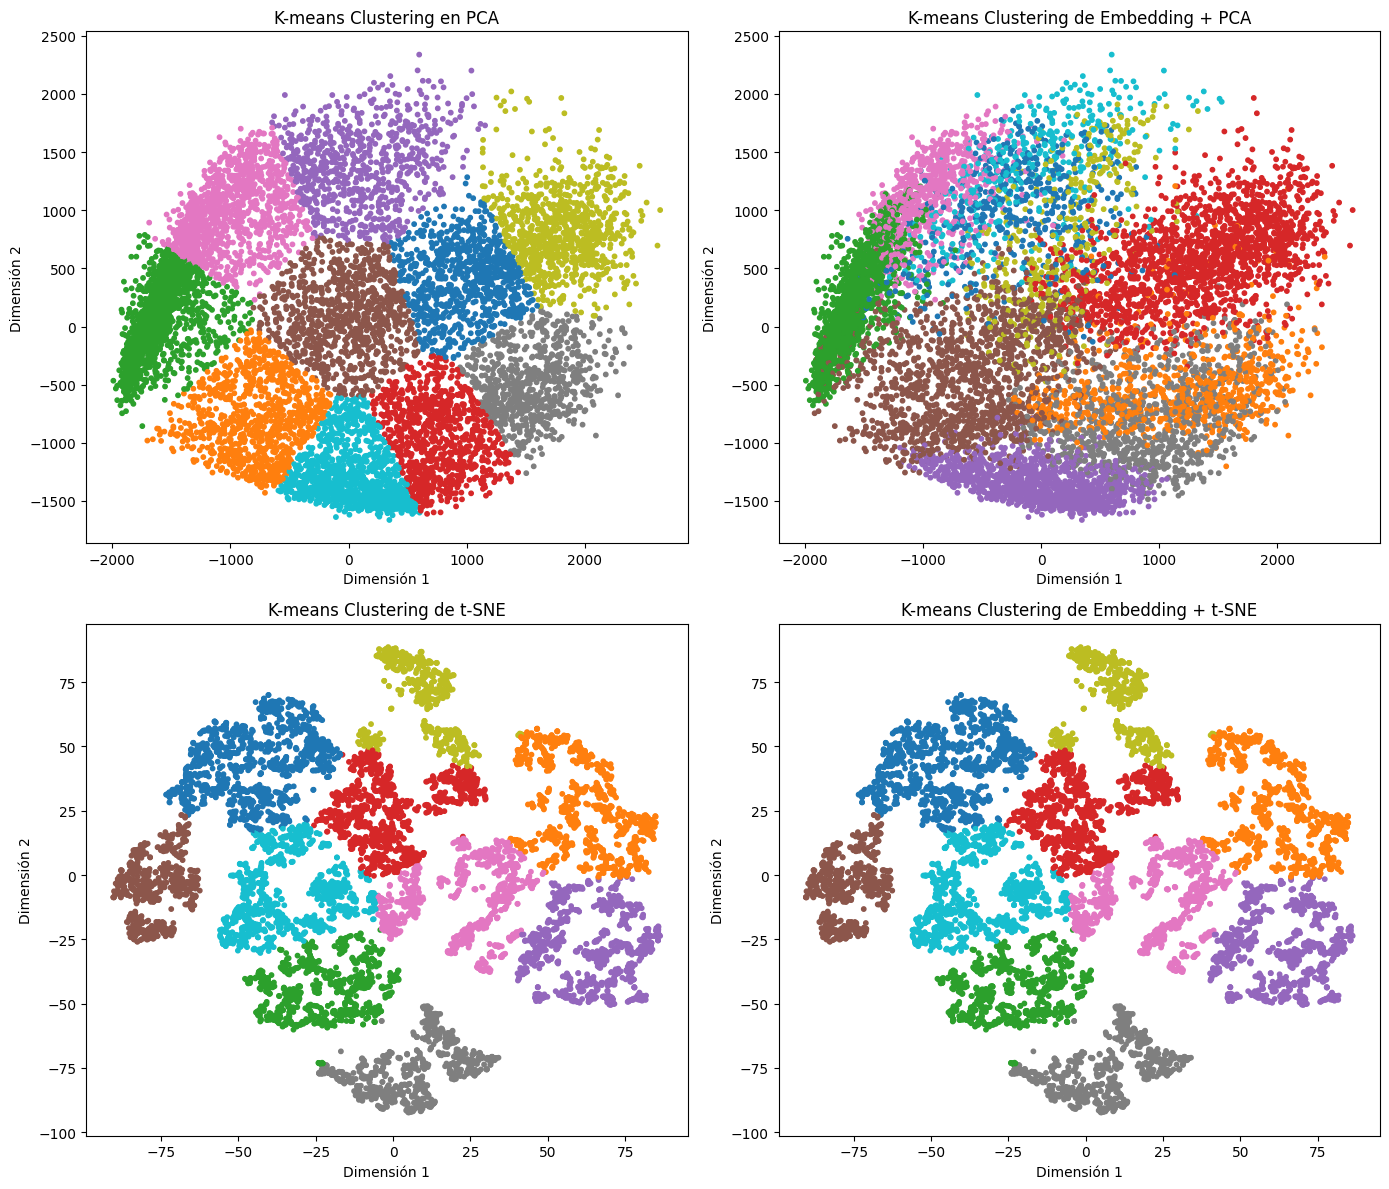

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Reduce el tamaño del conjunto de datos a 10,000 ejemplos aleatorios
data_sample = data.sample(n=10000, random_state=42)

# Extrae las características (columnas de píxeles) de la muestra
X = data_sample.iloc[:, 1:].values

# Realiza el embedding Isomap a 10 dimensiones
isomap = Isomap(n_neighbors=30, n_components=10)
X_isomap = isomap.fit_transform(X)

# Realiza la proyección t-SNE a dos dimensiones en el embedding Isomap
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_isomap)

# Realiza PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplica K-Means en cada escenario
kmeans_pca = KMeans(n_clusters=10, random_state=42)
kmeans_embedding_pca = KMeans(n_clusters=10, random_state=42)
kmeans_tsne = KMeans(n_clusters=10, random_state=42)
kmeans_embedding_tsne = KMeans(n_clusters=10, random_state=42)

# Asigna las etiquetas de clusters en cada escenario
labels_pca = kmeans_pca.fit_predict(X_pca)
labels_embedding_pca = kmeans_embedding_pca.fit_predict(X_isomap)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)
labels_embedding_tsne = kmeans_embedding_tsne.fit_predict(X_tsne)

# Plotea los clusters en los cuatro escenarios
plt.figure(figsize=(14, 12))

# K-means Clustering en PCA
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='tab10', marker='o', s=10)
plt.title('K-means Clustering en PCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# K-means Clustering de Embedding + PCA
plt.subplot(2, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_embedding_pca, cmap='tab10', marker='o', s=10)
plt.title('K-means Clustering de Embedding + PCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# K-means Clustering de t-SNE
plt.subplot(2, 2, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='tab10', marker='o', s=10)
plt.title('K-means Clustering de t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# K-means Clustering de Embedding + t-SNE
plt.subplot(2, 2, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_embedding_tsne, cmap='tab10', marker='o', s=10)
plt.title('K-means Clustering de Embedding + t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

plt.tight_layout()
plt.show()


Se observa que el clustering se realizó de mejor manera en PCA sin embedding porque todos los datapoints están mejor separados de otros grupo y agrupada de manera más compacta (forma regular y no alargada) que en los otros casos.

## Item 7: 